In [2]:
from langgraph.graph import Graph, START, END
from IPython.display import Image, display
from langchain_openai import ChatOpenAI
from dotenv import load_dotenv 

In [15]:
llm= ChatOpenAI()
graph= Graph()

In [16]:
def node1(start):
    return start

In [17]:
def node2(input):
    return input.upper()

In [18]:
def node3(data):
    return llm.invoke(data).content

In [19]:
graph.add_node('node1', node1)
graph.add_node('node2', node2)
graph.add_node('llm', node3)
graph.add_edge(START, 'node1')
graph.add_edge('node1', 'llm')
graph.add_edge('llm', 'node2')
graph.add_edge('node2', END)


In [20]:
graph= graph.compile()

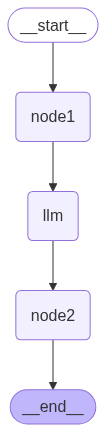

In [23]:
try:
    display(Image(graph.get_graph().draw_mermaid_png(max_retries=2, retry_delay=2.0)))
except Exception as e:
    print(e)

In [26]:
graph.invoke("Who is Prime minister of India and what is his term?")

'AS OF SEPTEMBER 2021, THE PRIME MINISTER OF INDIA IS NARENDRA MODI. HIS CURRENT TERM BEGAN ON MAY 30, 2019, AFTER HIS PARTY, THE BHARATIYA JANATA PARTY (BJP), WON THE GENERAL ELECTIONS IN INDIA.'